In [4]:
from matplotlib import pyplot
from deck import Deck, Card
from comparison import Compare
from game import simulateGame
import sys

In [5]:
deck = Deck()
deck.shuffleDeck()

optimal_pts = []
max_pts = []
random_pts = []
best_score = {}
for i in range(5):
    best_score[i] = 0

In [32]:
num_iters = 500
for i in range(num_iters):
    # print the current iteration to show progress
    print(str(i+1) + ' out of ' + str(num_iters), end='', flush=True)
    sys.stdout.write('\r')

    pts = Compare.compareOnce(deck)
    optimal_pts.append(pts[0])
    max_pts.append(pts[1])
    random_pts.append(pts[2])
    
    if pts[0] > pts[1] and pts[0] > pts[2]:
        # optimal performed best
        best_score[0] += 1
    elif pts[1] > pts[0] and pts[1] > pts[2]:
        # max performed best
        best_score[1] += 1
    elif pts[2] > pts[1] and pts[2] > pts[0]:
        # max performed best
        best_score[2] += 1
    elif pts[0] == pts[1]:
        # opt and max tied
        best_score[3] += 1
    else:
        # something else tied
        best_score[4] += 1

Text(0.5, 1.0, 'Average Hand Scores for each method')

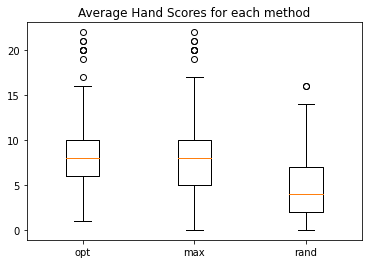

In [33]:
bp = pyplot.boxplot([optimal_pts, max_pts, random_pts])
pyplot.xticks([1, 2, 3], ["opt", "max", "rand"])
pyplot.title('Average Hand Scores for each method')

Text(0.5, 1.0, 'Hand Winner')

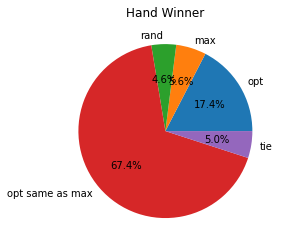

In [38]:
pie_data = [best_score[i] for i in range(5)]
my_labels = ["opt", "max", "rand", "opt same as max", "tie"]
pyplot.pie(pie_data, labels=my_labels, autopct='%1.1f%%')
pyplot.title('Hand Winner')

In [6]:
players = ["Optimal Player", "Random Player"]
rand_vs_opt = {"Optimal Player": 0, "Random Player": 0}

In [7]:
num_iters = 500
for i in range(num_iters):
    rand_vs_opt[(simulateGame(players, strat1="opt", strat2="rand"))] += 1
    print(str(i+1) + ' out of ' + str(num_iters), end='', flush=True)
    sys.stdout.write('\r')

Text(0.5, 1.0, 'Game Winner')

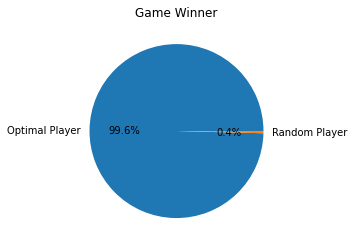

In [8]:
pie_data = [rand_vs_opt[key] for key in rand_vs_opt]
labels = [key for key in rand_vs_opt]
pyplot.pie(pie_data, labels=players, autopct='%1.1f%%')
pyplot.title('Game Winner')

In [13]:
players = ["Optimal Player", "Max Player"]
max_vs_opt = {"Optimal Player": 0, "Max Player": 0}

In [14]:
num_iters = 500
for i in range(num_iters):
    max_vs_opt[(simulateGame(players, strat1="opt", strat2="max"))] += 1
    print(str(i+1) + ' out of ' + str(num_iters), end='', flush=True)
    sys.stdout.write('\r')

Text(0.5, 1.0, 'Game Winner')

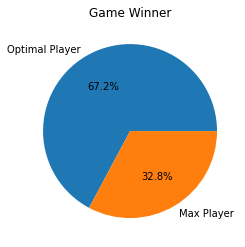

In [15]:
pie_data = [max_vs_opt[key] for key in max_vs_opt]
labels = [key for key in max_vs_opt]
pyplot.pie(pie_data, labels=players, autopct='%1.1f%%')
pyplot.title('Game Winner')

In [18]:
players = ["Random Player", "Max Player"]
rand_vs_max = {"Random Player": 0, "Max Player": 0}

In [19]:
num_iters = 500
for i in range(num_iters):
    rand_vs_max[(simulateGame(players, strat1="rand", strat2="max"))] += 1
    print(str(i+1) + ' out of ' + str(num_iters), end='', flush=True)
    sys.stdout.write('\r')

Text(0.5, 1.0, 'Game Winner')

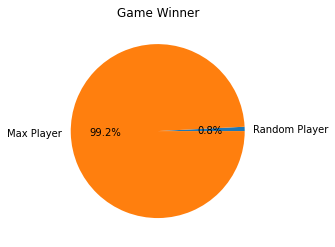

In [20]:
pie_data = [rand_vs_max[key] for key in rand_vs_max]
labels = [key for key in rand_vs_max]
pyplot.pie(pie_data, labels=players, autopct='%1.1f%%')
pyplot.title('Game Winner')